In [7]:
import keras
import os
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline

Using TensorFlow backend.


# Download Dataset

In [2]:
!wget http://files.fast.ai/data/dogscats.zip

--2019-06-13 16:36:01--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  15.6MB/s    in 53s     

2019-06-13 16:37:00 (15.3 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



# Prepare dataset

In [0]:
!unzip dogscats.zip

In [0]:
dataset_path = "./dogscats"
training_set = dataset_path + "/train"
validation_set =dataset_path + "/valid"

In [0]:
def prepare_dataset(train_dir, val_dir, size):
  
  # training set
  
  directory = os.listdir(train_dir + '/dogs')
  train_dogs = []
  train_dogs_labels = []
  for img in directory:
    train_dogs.append(cv2.resize(cv2.imread(train_dir + '/dogs/' + img), (size, size)).reshape(-1))
    train_dogs_labels.append(1)
    
  train_dogs = np.array(train_dogs)
  train_dogs_labels = np.array(train_dogs_labels)
  directory = os.listdir(train_dir + '/cats')
  train_cats = []
  train_cats_labels = []
  for img in directory:
    train_cats.append(cv2.resize(cv2.imread(train_dir + '/cats/' + img), (size, size)).reshape(-1))
    train_cats_labels.append(0)

  train_cats = np.array(train_cats)
  train_cats_labels = np.array(train_cats_labels)
  
  # validation set
  
  directory = os.listdir(val_dir + '/dogs')
  val_dogs = []
  val_dogs_labels = []
  for img in directory:
    val_dogs.append(cv2.resize(cv2.imread(val_dir + '/dogs/' + img), (size, size)).reshape(-1))
    val_dogs_labels.append(1)
    
  val_dogs = np.array(val_dogs)
  val_dogs_labels = np.array(val_dogs_labels)
  
  directory = os.listdir(val_dir + '/cats')
  val_cats = []
  val_cats_labels = []
  for img in directory:
    val_cats.append(cv2.resize(cv2.imread(val_dir + '/cats/' + img), (size, size)).reshape(-1))
    val_cats_labels.append(0)

  val_cats = np.array(val_cats)
  val_cats_labels = np.array(val_cats_labels)
  
  
  x_train = np.concatenate((train_dogs, train_cats))
  y_train = np.concatenate((train_dogs_labels, train_cats_labels))
  
  x_test = np.concatenate((val_dogs, val_cats))
  y_test = np.concatenate((val_dogs_labels, val_cats_labels))
  
  x_train, y_train = shuffle(x_train, y_train, random_state=123)
  x_test, y_test = shuffle(x_test, y_test, random_state=123)
  
  return x_train, y_train, x_test, y_test

In [0]:
x_train, y_train, x_test, y_test = prepare_dataset(training_set, validation_set, size=100)

In [11]:
print("Shape of images in the training set:", x_train.shape)

Shape of images in the training set: (23000, 30000)


In [12]:
print("Shape of images in the validation set:", x_test.shape)

Shape of images in the validation set: (2000, 30000)


# Normalize data

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Feature extraction

In [0]:
pca = PCA(n_components=200)
pca.fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

# Model architecture

In [0]:
model = models.Sequential()
# model.add(layers.Dense(512, activation='relu', input_dim=(200)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid', input_dim=(200)))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 201       
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


# Cost function, optimizer, ...

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

# Training

In [50]:
history = model.fit(x=x_train, y=y_train, epochs=50, validation_data=(x_test, y_test))

Train on 23000 samples, validate on 2000 samples
Epoch 1/50
23000/23000 [==============================] - 3s 122us/step - loss: 0.9025 - acc: 0.5525 - val_loss: 0.6692 - val_acc: 0.6090
Epoch 2/50
23000/23000 [==============================] - 3s 110us/step - loss: 0.6616 - acc: 0.6061 - val_loss: 0.6538 - val_acc: 0.6310
Epoch 3/50
23000/23000 [==============================] - 3s 109us/step - loss: 0.6586 - acc: 0.6076 - val_loss: 0.6529 - val_acc: 0.6235
Epoch 4/50
23000/23000 [==============================] - 3s 109us/step - loss: 0.6588 - acc: 0.6089 - val_loss: 0.6486 - val_acc: 0.6280
Epoch 5/50
23000/23000 [==============================] - 3s 110us/step - loss: 0.6581 - acc: 0.6088 - val_loss: 0.6569 - val_acc: 0.6185
Epoch 6/50
23000/23000 [==============================] - 2s 108us/step - loss: 0.6585 - acc: 0.6093 - val_loss: 0.6527 - val_acc: 0.6235
Epoch 7/50
23000/23000 [==============================] - 3s 109us/step - loss: 0.6584 - acc: 0.6107 - val_loss: 0.6488 - v

# Plot accuracy and loss

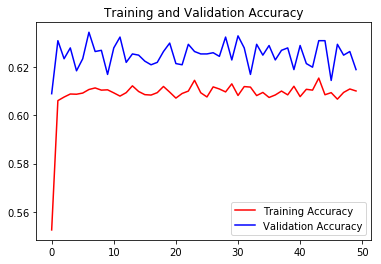

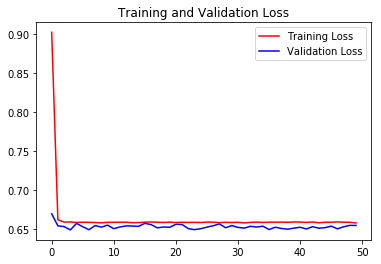

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model

In [53]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print('Accuracy on Validation Set:', test_acc)

2000/2000 [==============================] - 0s 54us/step
Accuracy on Validation Set: 0.619


# Train more with lower learning rate

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-6),
              metrics=['acc'])

history = model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test))

Train on 23000 samples, validate on 2000 samples
Epoch 1/10
23000/23000 [==============================] - 3s 128us/step - loss: 0.6541 - acc: 0.6086 - val_loss: 0.6542 - val_acc: 0.6175
Epoch 2/10
23000/23000 [==============================] - 3s 110us/step - loss: 0.6540 - acc: 0.6091 - val_loss: 0.6541 - val_acc: 0.6165
Epoch 3/10
23000/23000 [==============================] - 3s 110us/step - loss: 0.6538 - acc: 0.6096 - val_loss: 0.6540 - val_acc: 0.6170
Epoch 4/10
23000/23000 [==============================] - 2s 108us/step - loss: 0.6537 - acc: 0.6097 - val_loss: 0.6539 - val_acc: 0.6160
Epoch 5/10
23000/23000 [==============================] - 3s 109us/step - loss: 0.6535 - acc: 0.6107 - val_loss: 0.6538 - val_acc: 0.6160
Epoch 6/10
23000/23000 [==============================] - 2s 108us/step - loss: 0.6534 - acc: 0.6109 - val_loss: 0.6537 - val_acc: 0.6155
Epoch 7/10
23000/23000 [==============================] - 3s 113us/step - loss: 0.6533 - acc: 0.6116 - val_loss: 0.6537 - v

# Evaluate the model

In [56]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print('Accuracy on Validation Set:', test_acc)

2000/2000 [==============================] - 0s 59us/step
Accuracy on Validation Set: 0.618
